In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data,wb
from datetime import date
import matplotlib.pyplot as plt
import pandas_datareader as pdr

C:\Users\Bright\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
risk_free_rate = 0.05

In [5]:
def capm(start_date, end_date, ticker1, ticker2):
    
    stock1 = pdr.get_data_yahoo(ticker1, start_date, end_date)
    stock2 = pdr.get_data_yahoo(ticker2, start_date, end_date)
    
    return_stock1 = stock1.resample('M').last()
    return_stock2 = stock2.resample('M').last()
    
    data = pd.DataFrame({'s_adjclose': return_stock1['Adj Close'], 'm_adjclose': return_stock2['Adj Close']}, index = return_stock1.index)
    data[['s_returns', 'm_returns']] = np.log(data[['s_adjclose','m_adjclose']]/data[['s_adjclose','m_adjclose']].shift(1))
    
    data = data.dropna()
    
    covmat = np.cov(data['s_returns'], data['m_returns'])
    print(covmat)
    
    beta = covmat[0, 1]/covmat[1,1]
    print('Beta from formula:', beta)
    
    beta,alpha = np.polyfit(data['m_returns'], data['s_returns'], deg=1)
    print('Beta from regressions:', beta)
    
    fig,axis = plt.subplots(1, figsize=(20, 10))
    axis.scatter(data['m_returns'], data['s_returns'], label='data points')
    axis.plot(data['m_returns'], beta*data['m_returns'] + alpha, color='red', label='CAPM Line')
    plt.title('Capital Asset Pricing Model, finding alphas and betas')
    plt.xlabel('Market Return $R_a$', fontsize=18)
    plt.ylabel('Stock return $R_a$')
    plt.text(0.08, 0.05, r'$R_a = \beta * R_m + \alpha$', fontsize=25)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    expected_return = risk_free_rate + beta*(data['m_returns'].mean()*12-risk_free_rate)
    print('Expected return:', expected_return)    

[[0.00231388 0.00093843]
 [0.00093843 0.00131399]]
Beta from formula: 0.7141847120261112
Beta from regressions: 0.7141847120261114


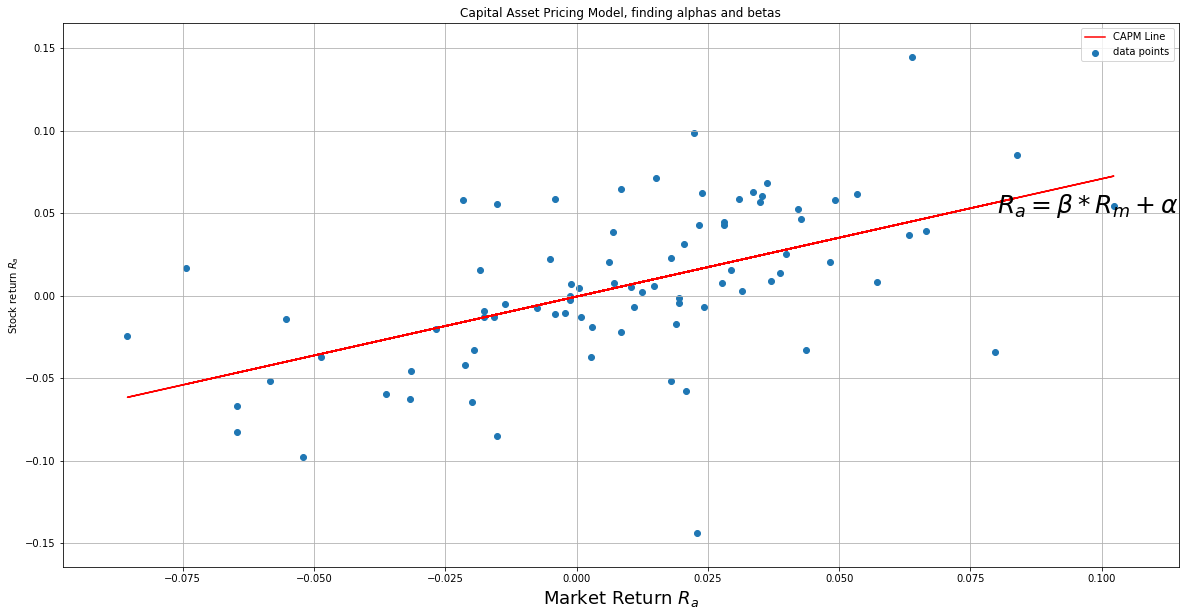

Expected return: 0.09015106885111179


In [6]:
capm('2010-01-01', '2017-01-01', 'IBM', '^GSPC')